- First, we import the necessary packages to carry out the analyses and visualisations.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
RANDOM_STATE = 42
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.stats import pearsonr, spearmanr
from sklearn import preprocessing
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist, squareform

- As guessing dtypes for every column is too memory demanding for Pandas, which tries to determine what dtype to set by analyszing the data in each column. To prevent the warning, we set low_memory=False.

In [2]:
df = pd.read_csv('tweets_Landuse_weather.csv', low_memory=False)
df.head()
df.shape

(97167, 29)

- Now, we delete duplicate tweets to ensure the data is free from bots. Then, we check the shape again to assess if there were any.  

In [3]:
df.drop_duplicates(inplace = True)
df.shape

(97167, 29)

- We check the type of data in each column

In [4]:
df.dtypes

field_1         int64
tweet_text     object
latitude      float64
longitude     float64
tweet_date      int64
year          float64
month         float64
day           float64
cleanTxt       object
Subjectivi    float64
Polarity      float64
Analysis       object
Temperatur     object
TempVariat     object
Sunny          object
Pressure       object
Humidity       object
Rainy          object
Snow           object
Thundersto     object
AvgTemp       float64
TempVar       float64
SunTime       float64
PpDur         float64
PpAmount      float64
AvgPres       float64
AvgHum        float64
CBScode2_1     object
CBScode1_1     object
dtype: object

- We check the first rows of the dataframe to get an idea of how the data looks

In [5]:
df.head()

,field_1,tweet_text,latitude,longitude,tweet_date,year,month,day,cleanTxt,Subjectivi,...,Thundersto,AvgTemp,TempVar,SunTime,PpDur,PpAmount,AvgPres,AvgHum,CBScode2_1,CBScode1_1
0,1,@pappybowe ah be happy boy,52.375137,4.896921,20131105,2013.0,11.0,5.0,ah be happy boy,1.000000,...,No,7.404167,5.7,0.9,8.3,17.9,993.054167,87.791667,"Shops, malls and hotels-restaurants-pubs",City area
1,4,A great dining area #amsterdam #holland #food ...,52.372625,4.894753,20131105,2013.0,11.0,5.0,A great dining area amsterdam holland food bus...,0.875000,...,No,7.404167,5.7,0.9,8.3,17.9,993.054167,87.791667,"Shops, malls and hotels-restaurants-pubs",City area
2,5,@gemblackburn is that right hard man.,52.359382,4.880072,20131105,2013.0,11.0,5.0,is that right hard man.,0.538690,...,No,7.404167,5.7,0.9,8.3,17.9,993.054167,87.791667,"Cultural, social, medical, educational",City area
3,8,Def a simple &amp effective way to humanize bu...,52.373640,4.903109,20131105,2013.0,11.0,5.0,Def a simple &amp effective way to humanize bu...,0.635714,...,No,7.404167,5.7,0.9,8.3,17.9,993.054167,87.791667,Other water wider than 6 meter,Water
4,12,Space cake was 6.50 euro and rolled strong joi...,52.363987,4.883680,20131105,2013.0,11.0,5.0,Space cake was 6.50 euro and rolled strong joi...,0.711111,...,No,7.404167,5.7,0.9,8.3,17.9,993.054167,87.791667,"Shops, malls and hotels-restaurants-pubs",City area


- We eliminate rows with NaN (not a number) values, which are undefined or unrepresentable values.

In [6]:
df = df.dropna()
df = df.reset_index(drop=True)

- We check the dataframe for missing data (NA values). All values appear valid and in place from the cleaning.

In [7]:
# Checking na values
print(df['tweet_text'].isna().sum())
print(df['latitude'].isna().sum())
print(df['longitude'].isna().sum())
print(df['tweet_date'].isna().sum())
print(df['year'].isna().sum())
print(df['month'].isna().sum())
print(df['day'].isna().sum())
print(df['cleanTxt'].isna().sum())
print(df['Analysis'].isna().sum())
print(df['Temperatur'].isna().sum())
print(df['TempVar'].isna().sum())
print(df['Sunny'].isna().sum())
print(df['Pressure'].isna().sum())
print(df['Humidity'].isna().sum())
print(df['Rainy'].isna().sum())
print(df['AvgTemp'].isna().sum())
print(df['TempVar'].isna().sum())
print(df['CBScode2_1'].isna().sum())
print(df['CBScode1_1'].isna().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [8]:
df['CBScode2_1'].value_counts()

Shops, malls and hotels-restaurants-pubs    27481
Living area                                 23820
Road traffic area                           17289
Other water wider than 6 meter               9134
Cultural, social, medical, educational       5125
Busines- industrial- trade-areas             2891
Building areas                               1599
Train-railway area                           1284
Parks and public gardens                     1020
Public offices and services                   263
Recreational areas (day)                       75
Sporting areas and sportbuildings              11
Water with recreative function                  3
Name: CBScode2_1, dtype: int64

PLOTS
- From here onwards, many plots that we did not use in our story map are shown. We think it is important to preserve them because they are part of the project, as they helped us to gain a better understanding of the data and the best ways to visualize it.

- Plots depicting the average weather conditions under which positive and negative tweets were published at each location. 

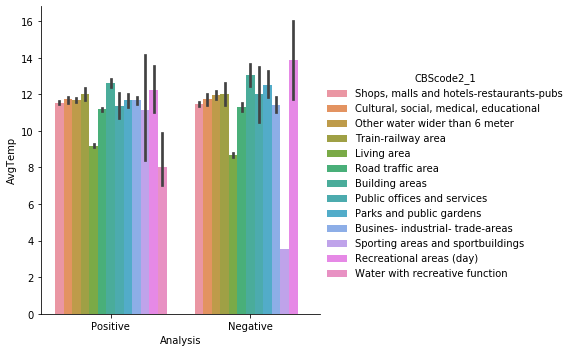

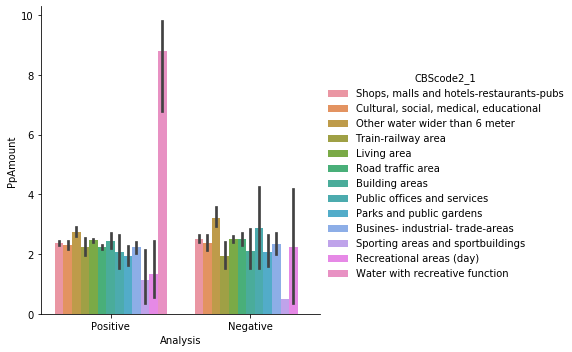

In [9]:
plot1 = sns.catplot(x='Analysis', y='AvgTemp', hue='CBScode2_1', kind='bar', data=df)
plot2=sns.catplot(x='Analysis', y='PpAmount', hue='CBScode2_1', kind='bar', data=df)

- Below, we assess the distribution of the data we have on different parameters.

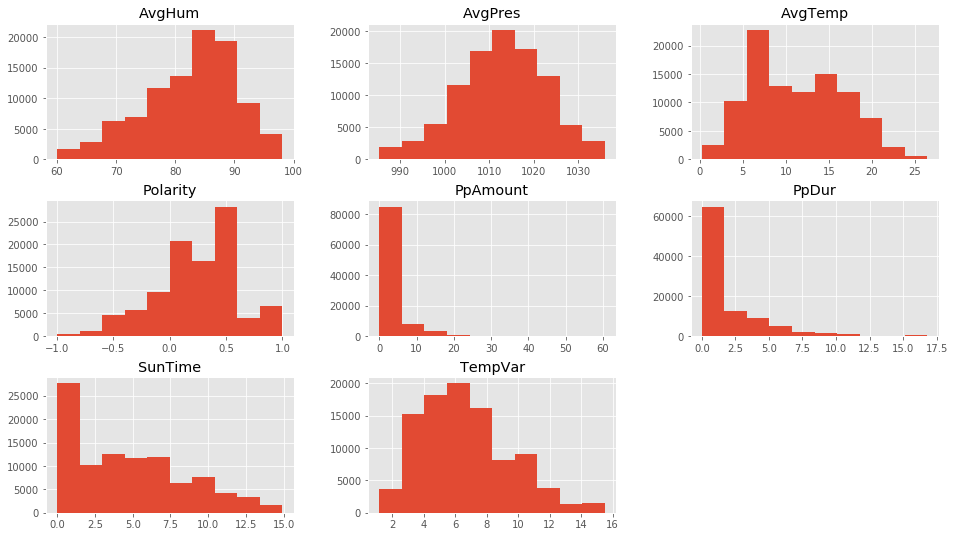

In [10]:
#Assess normalization
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

df = pd.read_csv('tweets_Landuse_Weather.csv', low_memory=False)

df.drop(columns=['latitude', 'longitude', 'year', 'day', 'month', 'tweet_date', 'field_1', 'Subjectivi'],inplace=True)

df.hist()
plt.show()



- As Polarity does not appear to present a fully normal distribution, we normalize it.

In [11]:
x = np.array(df['Polarity'])
Polarity = preprocessing.normalize([x])

LINEAR REGRESSION

In [12]:
df_cluster=df.fillna(0)
X = df[["AvgTemp"]]
y = df["Polarity"]

In [13]:
reg = linear_model.LinearRegression(n_jobs=1)
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
reg.coef_, reg.intercept_

(array([0.00123158]), 0.24179445069501962)

SPEARMAN CORRELATIONS

- We use spearman correlations, as not all datasets are normally distributed

In [15]:
for dataset in df:
    print(dataset)
    r, p_value = spearmanr(df[dataset], df['Polarity'])
    print(dataset, r, p_value)

tweet_text
tweet_text 0.07444219944981109 1.9350242008996564e-119
cleanTxt
cleanTxt -0.022984864524810664 7.744128453697186e-13
Polarity
Polarity 1.0 0.0
Analysis
Analysis 0.7216063255950687 0.0
Temperatur
Temperatur 0.02016184222496893 3.2715554884678146e-10
TempVariat
TempVariat 0.011074964754073893 0.000555813766805083
Sunny
Sunny nan nan
Pressure
Pressure -0.009618737219192444 0.0027144827017390885
Humidity
Humidity -0.01444822474436821 6.671035870246688e-06
Rainy
Rainy -0.016435650796488746 2.9985356164349927e-07
Snow


/Users/diegobb/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/diegobb/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/diegobb/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/diegobb/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/diegobb/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Snow nan nan
Thundersto
Thundersto -0.005540212482947562 0.08417392928299083
AvgTemp
AvgTemp 0.02029073448866629 2.523799308101744e-10
TempVar
TempVar 0.020010607975264747 4.427043142306437e-10
SunTime
SunTime 0.024083837080173403 5.989326833242961e-14
PpDur
PpDur -0.021835229616548497 9.957249936855773e-12
PpAmount
PpAmount -0.020510244226679228 1.6163736929677513e-10
AvgPres
AvgPres 0.010292148866138212 0.0013353449011597176
AvgHum
AvgHum -0.016836896614861426 1.532276639972451e-07
CBScode2_1
CBScode2_1 nan nan
CBScode1_1
CBScode1_1 nan nan


-HEATMAP

- Heatmap showing spearman correlations among all the variables and square linkages portraying correlation distances. As can be observed, polarity is not significantly correlated to any variable. 

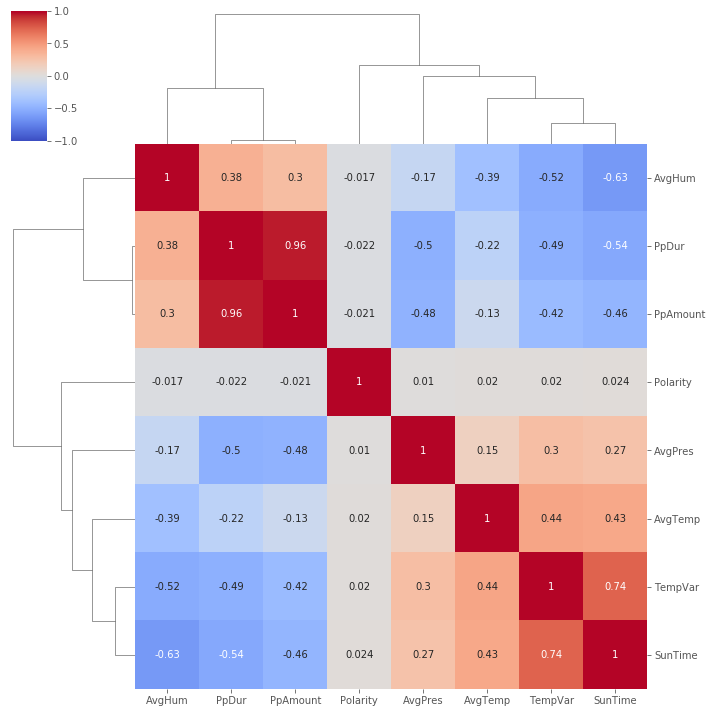

In [16]:
#Pairwise spearman correlations
corr_mat = df.corr(method='spearman')

# Hierarchical clustering using complete linkage
# scipy.cluster.hierarchy.linkage expects as input a distance measure, 
# so we turn the correlation correlation coefficient into a distance 
# by calculating d = 1 - r
corr_distance = linkage(squareform(1 - corr_mat), method='complete')

# Plot as clustermap
sns.clustermap(corr_mat, col_linkage=corr_distance, row_linkage=corr_distance,
               figsize=(10, 10), cmap='coolwarm', vmin=-1,vmax=1, annot=True)

- Bivariate distribution with a contour plot

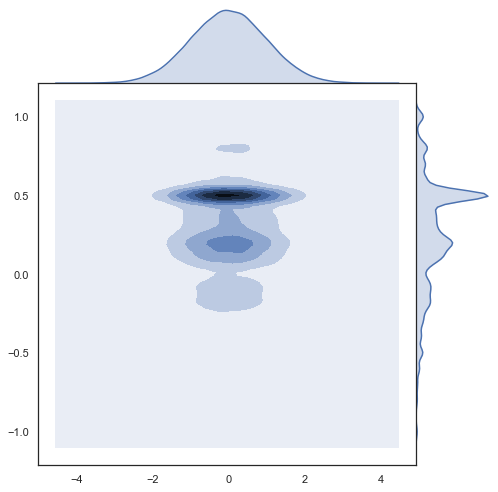

In [17]:
sns.set(style="white")

# Generate a random correlated bivariate dataset
rs = np.random.RandomState(5)
mean = [0, 0]
cov = [(1, .5), (.5, 1)]
x1, x2 = rs.multivariate_normal(mean, cov, 97167).T
X1 = np.array(df["AvgTemp"])
x2 = np.array(df['Polarity'])

# Show the joint distribution using kernel density estimation
g = sns.jointplot(x1, x2, kind="kde", height=7, space=0)

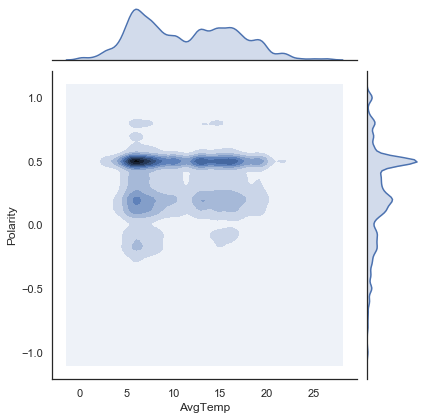

In [18]:
sns.jointplot(x="AvgTemp", y="Polarity", data=df, kind="kde");

- Scatterplot to visualise bivariate distribution

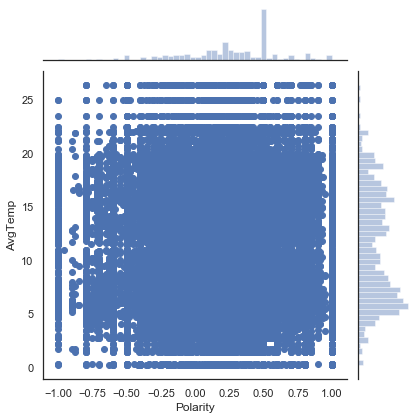

In [19]:
sns.jointplot(x="Polarity", y="AvgTemp", data=df);

In [20]:
df.head()

,tweet_text,cleanTxt,Polarity,Analysis,Temperatur,TempVariat,Sunny,Pressure,Humidity,Rainy,...,Thundersto,AvgTemp,TempVar,SunTime,PpDur,PpAmount,AvgPres,AvgHum,CBScode2_1,CBScode1_1
0,@pappybowe ah be happy boy,ah be happy boy,0.800000,Positive,Cold,Moderate,Not Sunny,Low,Uncomfortable - High,Yes,...,No,7.404167,5.7,0.9,8.3,17.9,993.054167,87.791667,"Shops, malls and hotels-restaurants-pubs",City area
1,A great dining area #amsterdam #holland #food ...,A great dining area amsterdam holland food bus...,0.650000,Positive,Cold,Moderate,Not Sunny,Low,Uncomfortable - High,Yes,...,No,7.404167,5.7,0.9,8.3,17.9,993.054167,87.791667,"Shops, malls and hotels-restaurants-pubs",City area
2,@gemblackburn is that right hard man.,is that right hard man.,-0.002976,Negative,Cold,Moderate,Not Sunny,Low,Uncomfortable - High,Yes,...,No,7.404167,5.7,0.9,8.3,17.9,993.054167,87.791667,"Cultural, social, medical, educational",City area
3,Def a simple &amp effective way to humanize bu...,Def a simple &amp effective way to humanize bu...,0.466667,Positive,Cold,Moderate,Not Sunny,Low,Uncomfortable - High,Yes,...,No,7.404167,5.7,0.9,8.3,17.9,993.054167,87.791667,Other water wider than 6 meter,Water
4,Space cake was 6.50 euro and rolled strong joi...,Space cake was 6.50 euro and rolled strong joi...,0.405556,Positive,Cold,Moderate,Not Sunny,Low,Uncomfortable - High,Yes,...,No,7.404167,5.7,0.9,8.3,17.9,993.054167,87.791667,"Shops, malls and hotels-restaurants-pubs",City area


- Visualisation of multiple pairwise bivariate distributions in a dataset. It shows the relationship for each pair of columns in a dataframe. The univariate distribution of each variable is shown by default on the diagonal axis. The location from where the tweets where published is assigned to the "hue" parameter to gain a better understanding of the data through viusalisation.

/Users/diegobb/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


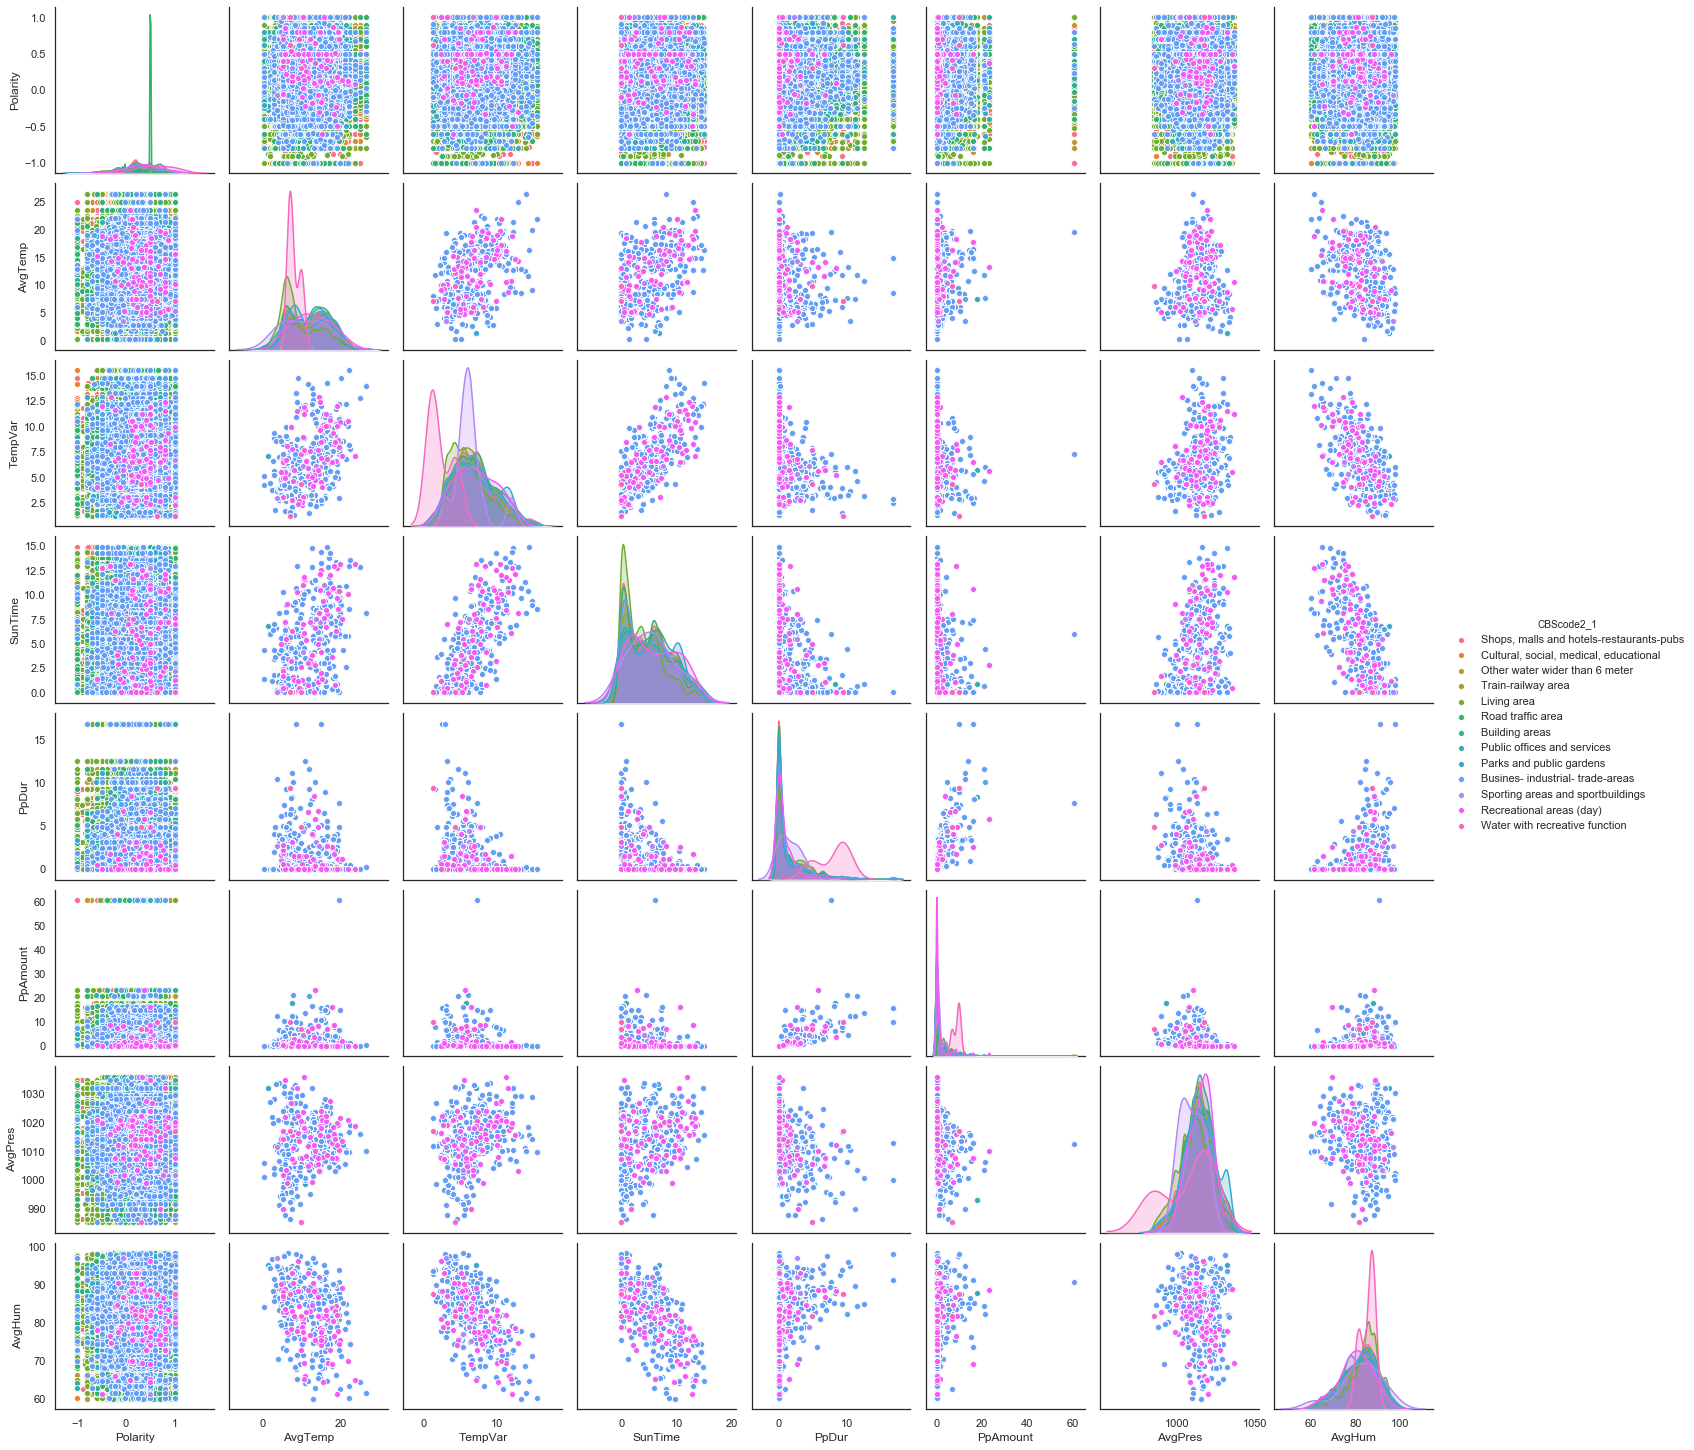

In [21]:
sns.pairplot(df, hue="CBScode2_1");

- We changed location labels to numbers so that we can use the variable in plots.

In [25]:
df=df.fillna(0)
CBScode2_1 = {'Shops, malls and hotels-restaurants-pubs': 1,'Cultural, social, medical, educational': 2, 'Other water wider than 6 meter': 3, 'Train-railway area': 4, 'Living area': 5, 'Road traffic area': 6, 'Building areas': 7, 'Public offices and services': 8, 'Parks and public gardens': 9, 'Busines- industrial- trade-areas': 10, 'Sporting areas and sportbuildings': 11, 'Recreational areas (day)': 12, 'Water with recreative function': 13, 0: 0} 
df.CBScode2_1 = [CBScode2_1[item] for item in df.CBScode2_1]
df.head()

,tweet_text,cleanTxt,Polarity,Analysis,Temperatur,TempVariat,Sunny,Pressure,Humidity,Rainy,...,Thundersto,AvgTemp,TempVar,SunTime,PpDur,PpAmount,AvgPres,AvgHum,CBScode2_1,CBScode1_1
0,@pappybowe ah be happy boy,ah be happy boy,0.800000,Positive,Cold,Moderate,Not Sunny,Low,Uncomfortable - High,Yes,...,No,7.404167,5.7,0.9,8.3,17.9,993.054167,87.791667,1,City area
1,A great dining area #amsterdam #holland #food ...,A great dining area amsterdam holland food bus...,0.650000,Positive,Cold,Moderate,Not Sunny,Low,Uncomfortable - High,Yes,...,No,7.404167,5.7,0.9,8.3,17.9,993.054167,87.791667,1,City area
2,@gemblackburn is that right hard man.,is that right hard man.,-0.002976,Negative,Cold,Moderate,Not Sunny,Low,Uncomfortable - High,Yes,...,No,7.404167,5.7,0.9,8.3,17.9,993.054167,87.791667,2,City area
3,Def a simple &amp effective way to humanize bu...,Def a simple &amp effective way to humanize bu...,0.466667,Positive,Cold,Moderate,Not Sunny,Low,Uncomfortable - High,Yes,...,No,7.404167,5.7,0.9,8.3,17.9,993.054167,87.791667,3,Water
4,Space cake was 6.50 euro and rolled strong joi...,Space cake was 6.50 euro and rolled strong joi...,0.405556,Positive,Cold,Moderate,Not Sunny,Low,Uncomfortable - High,Yes,...,No,7.404167,5.7,0.9,8.3,17.9,993.054167,87.791667,1,City area


- As our dataset is quite large, we used Hexbin plots to represent bivariate distributions. These plots portray the counts of observations that fall within hexagonal bins and the distribution of both variables. As can be observed, most tweets are have a positive punctuation of 0.5 and most of them are published in the road traffic area. 

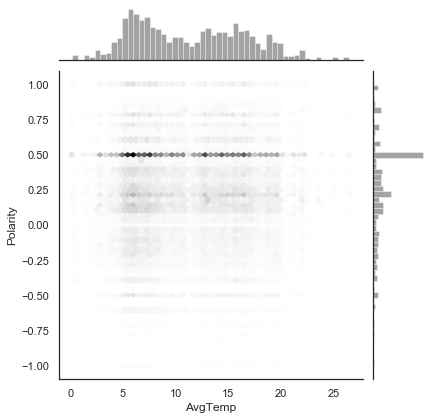

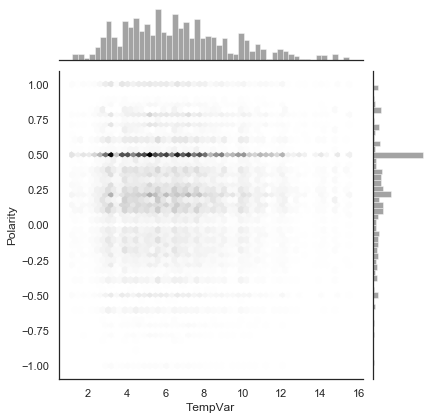

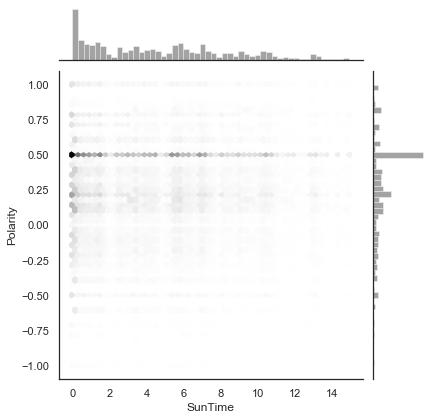

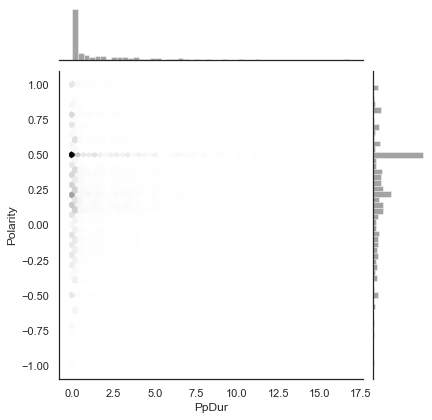

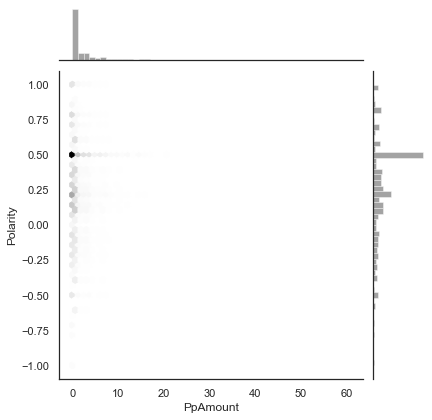

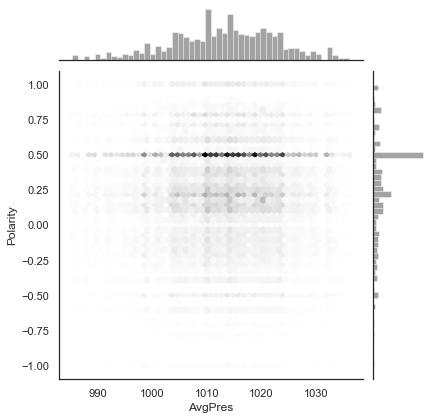

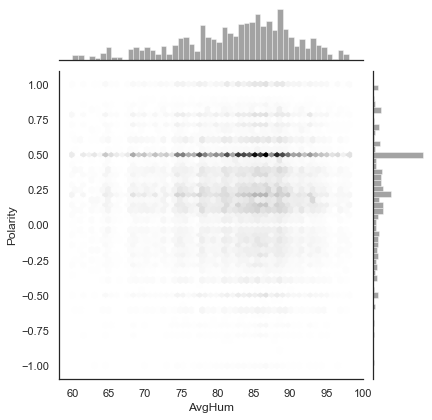

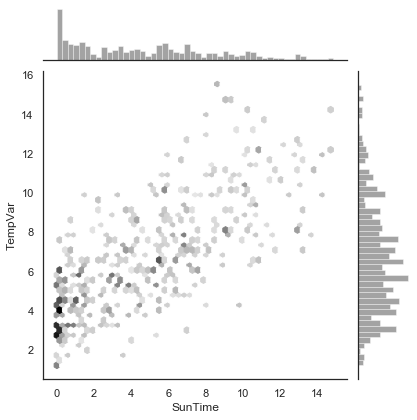

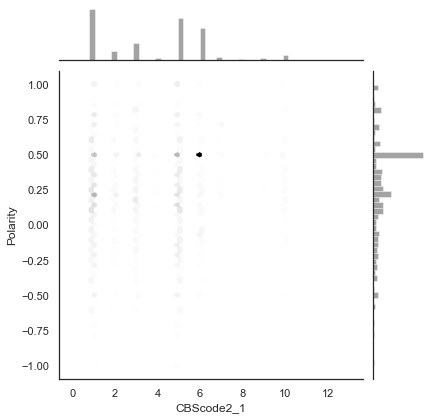

In [26]:
with sns.axes_style("white"):
    sns.jointplot(x=df['AvgTemp'], y=df['Polarity'], kind="hex", color="k")
with sns.axes_style("white"):
    sns.jointplot(x=df['TempVar'], y=df['Polarity'], kind="hex", color="k");
with sns.axes_style("white"):
    sns.jointplot(x=df['SunTime'], y=df['Polarity'], kind="hex", color="k");
with sns.axes_style("white"):
    sns.jointplot(x=df['PpDur'], y=df['Polarity'], kind="hex", color="k");
with sns.axes_style("white"):
    sns.jointplot(x=df['PpAmount'], y=df['Polarity'], kind="hex", color="k");
with sns.axes_style("white"):
    sns.jointplot(x=df['AvgPres'], y=df['Polarity'], kind="hex", color="k");
with sns.axes_style("white"):
    sns.jointplot(x=df['AvgHum'], y=df['Polarity'], kind="hex", color="k");
with sns.axes_style("white"):
    sns.jointplot(x=df['SunTime'], y=df['TempVar'], kind="hex", color="k");
with sns.axes_style("white"):
    sns.jointplot(x=df['CBScode2_1'], y=df['Polarity'], kind="hex", color="k");

- Violinplots are used to show bivariate relationships between variables. In the code below, we managed to get them all in the same output cell, so that they do not take a lot of room in the notebook. The quartile and whisker values from the boxplot are shown inside the violin.

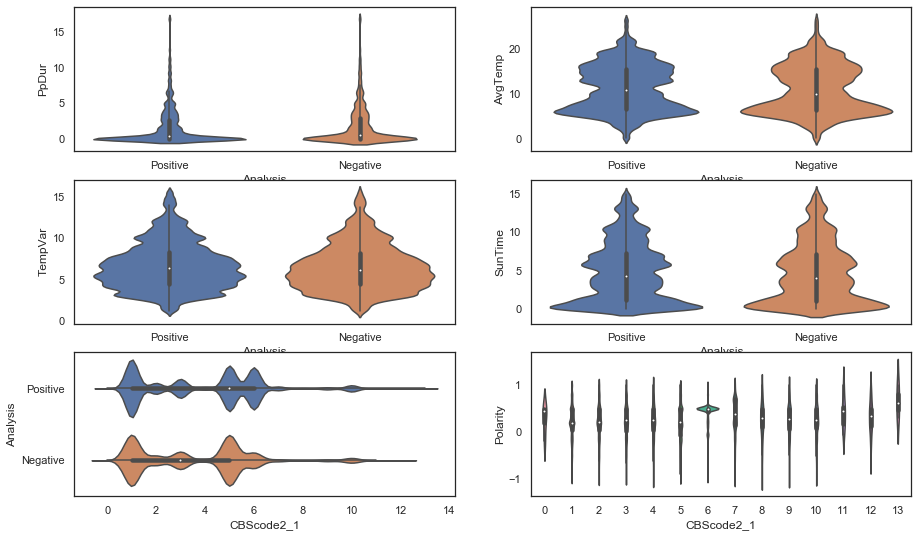

In [28]:
plt.figure(figsize=(15, 9))
plt.subplot(321)

sns.violinplot(x=df.Analysis, y=df.PpDur)

plt.subplot(322)

sns.violinplot(x=df.Analysis, y=df.AvgTemp)

plt.subplot(323)

sns.violinplot(x=df.Analysis, y=df.TempVar)

plt.subplot(324)

sns.violinplot(x=df.Analysis, y=df.SunTime)

plt.subplot(325)

sns.violinplot(x=df.CBScode2_1, y=df.Analysis)

plt.subplot(326)

sns.violinplot(x=df.CBScode2_1, y=df.Polarity) 

plt.show()

- The next visualisation (which can also be observed in above) depicts a similar relationship between positive and negative tweets concerning locations from where they are published, except for "road traffic areas", where most tweets are positive.

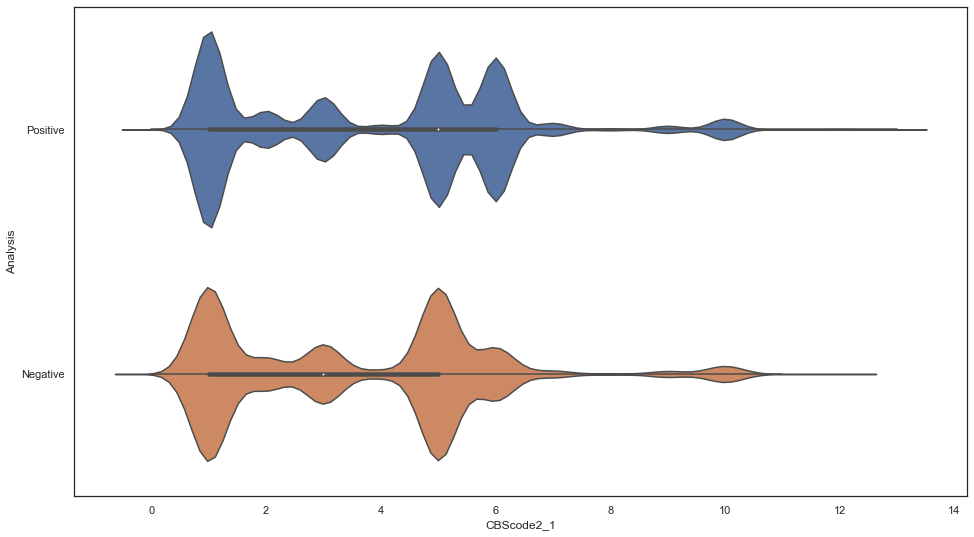

In [27]:
sns.violinplot(x=df.CBScode2_1, y=df.Analysis)

- Similar to the first violinplots, the visualisation below shows that most tweets are published from the "road traffic area".

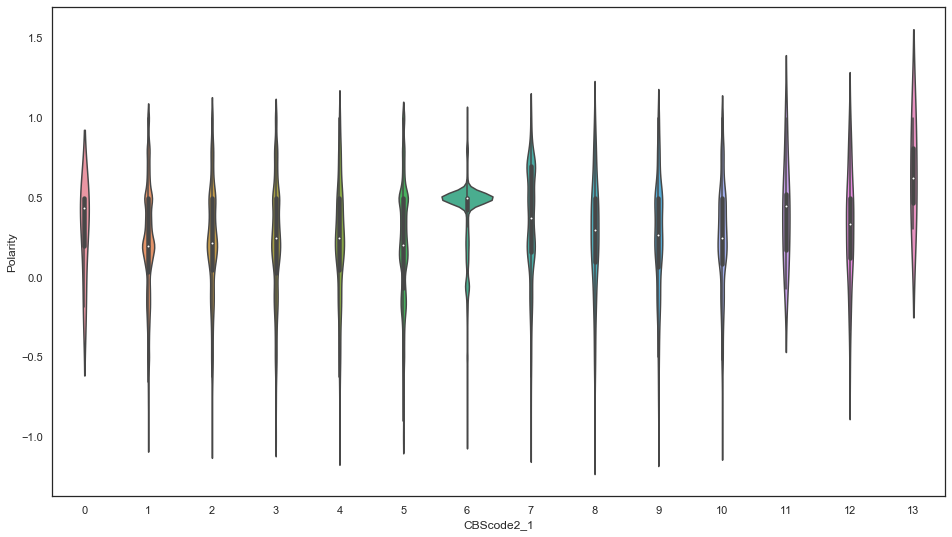

In [36]:
sns.violinplot(x=df.CBScode2_1, y=df.Polarity);

- We used a k-means algorithm to assess if the datasets variables form clusters.

- CLUSTERING
    - K-means with sklearn

- Now, we are going to cross 3 variables to see if we get any hint of their aggrupation and the relation with their categories (CBScode2_1)

In [37]:
#We load the variables polarity, avgtemp and suntime in the x axis.
X = np.array(df[["Polarity","AvgTemp","SunTime"]])
y = np.array(df['CBScode2_1'])
X.shape
#print(max(y))

(97167, 3)

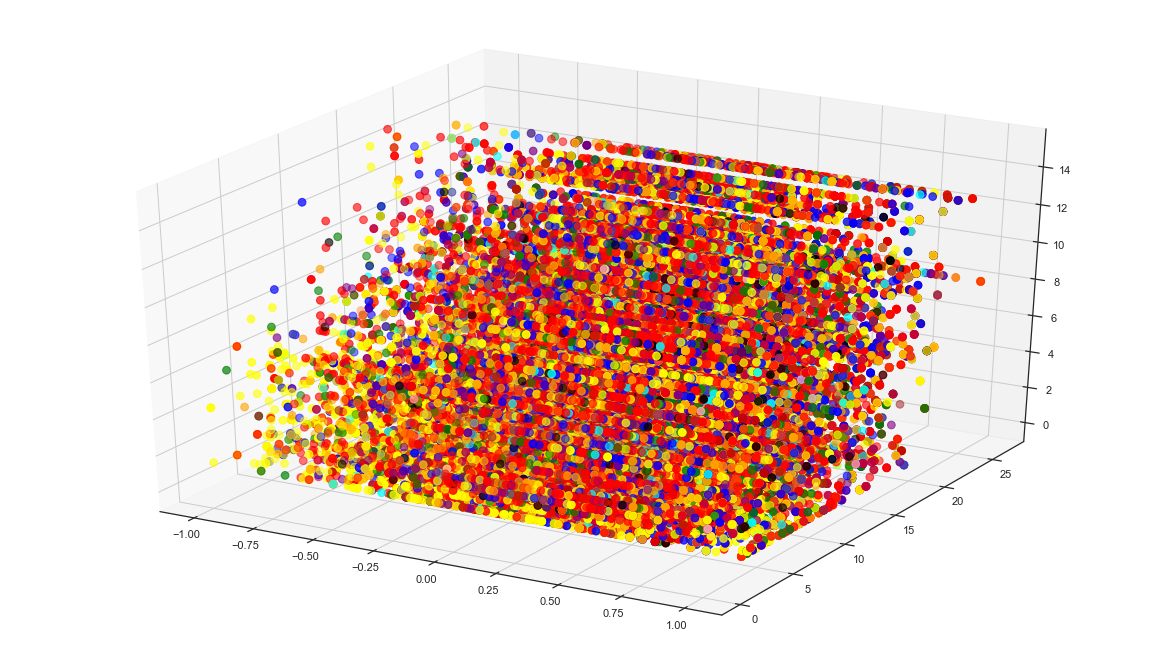

In [38]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple', 'white', 'blue','grey']
assign=[]
for row in y:
    assign.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=assign,s=60)